In [9]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 23 13:11:13 2022

@author: laoba
"""


import torch
import numpy as np 
import os
import sys
import ot
import matplotlib.pyplot as plt
import time


In [10]:
parent_path='/home/baly/projects/Sliced_opt/code'
sys.path.append(parent_path)
os.chdir(parent_path)
from sopt.library import *
from sopt.lib_ot import *   
from sopt.opt import pot  

In [11]:
test()

25


50
60
70


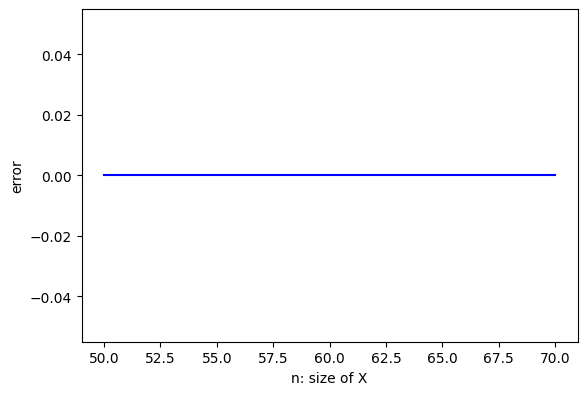

In [12]:

Lambda=100000.0

start_n=50
end_n=80
step=10
n_list=np.array(range(start_n,end_n,step))
N=n_list.shape[0]
k=5

cost_pot_list=np.zeros((N,k))
cost_lp_list=np.zeros((N,k))
for i in range (N):
    n=n_list[i]
    print(n)
    m=n+0
    for j in range(k):
        X=np.random.uniform(-20,20,n).astype(np.float32)
        # np.random.seed(m)
        Y=np.random.uniform(-40,40,m).astype(np.float32)
        X.sort()
        Y.sort()
        mu=np.ones(n)
        nu=np.ones(m)    
        M=cost_matrix(X,Y)
    #   cost_v2-=Lambda*np.sum(n-np.sum(L_v2>=0))
        numItermax=max(300000*n/1000,300000)
        cost_lp,L_lp=opt_lp(X,Y,Lambda,numItermax=numItermax)
        mass_lp=np.sum(L_lp)
        cost_lp=np.sum(M*L_lp) #+Lambda*(n-mass_lp)
        cost_lp_list[i,j]=cost_lp

        cost,L=pot(X,Y)
        L_pot=array_to_matrix(L,m)
        mass_pot=np.sum(L_pot)
        cost_pot=np.sum(M*L_pot) #+Lambda*(n-mass_pot)

        cost_pot_list[i,j]=cost_pot
        if abs(cost_pot-cost_lp)>1e-4:
            print('error')
            X0=X.copy()
            Y0=Y.copy()
#                break
#     else:
#         continue 
# else:
#     continue



error_pot_lp=abs(cost_pot_list-cost_lp_list)/n_list.reshape(N,1)
error_pot_lp_mean=error_pot_lp.mean(1)
error_pot_lp_std=error_pot_lp.std(1)
# error_v2a_lp=abs(cost_v2a_list-cost_lp_list)/n_list.reshape(N,1)
# error_v2a_lp_mean=error_v2a_lp.mean(1)
# error_v2a_lp_std=error_v2a_lp.std(1)*(k-1)/k

#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.plot(n_list,cost_v2_list/n_list,linewidth=3,label='ours')
#     plt.plot(n_list,cost_v2_a_list/n_list,label='ours-apro')
#     plt.plot(n_list,cost_pr_list/n_list,linewidth=2,label='Lp (primal): python OT')
#     plt.plot(n_list,cost_lp_list/n_list,label='Lp: python OT')
#     #lt.plot(range(start_n,end_n,step),cost_lp_list,label='Sinkhorn: python OT')
#     plt.xlabel("n: size of X")
#     plt.ylabel("normalized OPT distance")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                       box.width, box.height * 0.9])
#     plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2),
#               fancybox=True, shadow=True, ncol=3)
# #    plt.savefig("myImage.png", format="png", dpi=resolution_value)
#     plt.savefig('experiment/test/results/accuracy'+str(Lambda)+'.png',format="png",dpi=2000,bbox_inches='tight')
#     plt.show()


fig = plt.figure(1)
ax = plt.subplot(111)
plt.plot(n_list,error_pot_lp_mean,'-',c='blue',label='error |new-lp|')
plt.fill_between(n_list,error_pot_lp_mean-1*error_pot_lp_std,error_pot_lp_mean+1*error_pot_lp_std,alpha=0.3)

#    plt.plot(n_list,error_v2a_lp_mean,'-',label='error |outs_a-lp|',c='C1')
#    plt.fill_between(n_list,error_v2a_lp_mean-1*error_v2a_lp_std,error_v2a_lp_mean+1*error_v2a_lp_std,alpha=0.3)

plt.xlabel("n: size of X")
plt.ylabel("error")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                  box.width, box.height * 0.9])
#    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),              fancybox=True, shadow=True, ncol=3)
plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

# cost_list={}
# cost_list['cost_v2_list']=cost_v2_list
# cost_list['cost_v2a_list']=cost_v2a_list 
# cost_list['cost_pr_list']=cost_pr_list
# cost_list['cost_lp_list']=cost_lp_list
# cost_list['cost_new_list']=cost_new_list
# torch.save(cost_list,'experiment/test/results/accuracy_list'+str(Lambda)+'.pt')


# for Lambda in Lambda_list:
#     start_n=50
#     end_n=1000
#     step=5
#     cost_list=torch.load('experiment/test/results/accuracy_list'+str(Lambda)+'.pt')
#     cost_v2_list=cost_list['cost_v2_list']
#     cost_v2_a_list=cost_list['cost_v2_a_list'] 
#     cost_pr_list=cost_list['cost_pr_list']
#     cost_lp_list=cost_list['cost_lp_list']
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.semilogy(range(start_n,end_n,step),cost_v2_list-cost_lp_list,'-',label='error |outs-lp|')
#     plt.semilogy(range(start_n,end_n,step),cost_v2_a_list-cost_lp_list,label='error |ours_a-lp|')
#     plt.xlabel("n: size of X")
#     plt.ylabel("error")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                      box.width, box.height * 0.9])
#     plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),
#               fancybox=True, shadow=True, ncol=3)
#     plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=2000,bbox_inches='tight')
#     plt.show()



# plt.plot(range(start_n,end_n,10),time2_list,label='out OPT')
# plt.plot(range(start_n,end_n,10),time3_list,label='Partial OT')
# plt.plot(range(start_n,end_n,10),time4_list,label='Sinkhorn')
# plt.xlabel("n: size of X")
# plt.ylabel("runing time")
# plt.legend(loc='best')
# plt.show()

In [3]:
L_lp.shape

NameError: name 'L_lp' is not defined

In [22]:
n

60

In [23]:
m

60

In [24]:
M.shape

(50, 50)

50
60
70


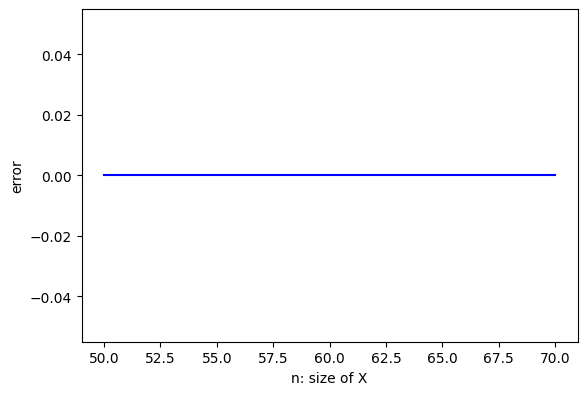

50
60
70


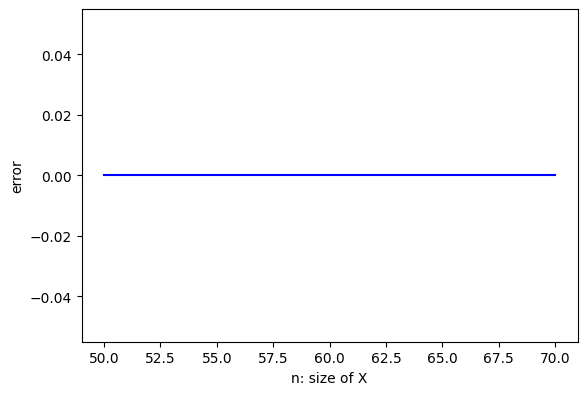

50
60
70


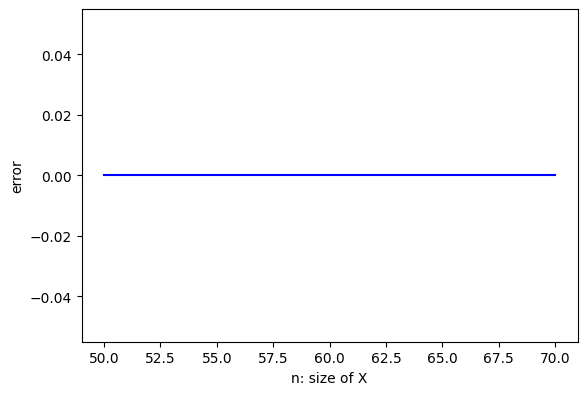

In [12]:

Lambda_list=np.array([10.0,50.0,100.0])

start_n=50
end_n=80
step=10
n_list=np.array(range(start_n,end_n,step))
N=n_list.shape[0]
k=5

for Lambda in Lambda_list:
    cost_v2_list=np.zeros((N,k))
    cost_v2a_list=np.zeros((N,k))
    cost_lp_list=np.zeros((N,k))
    cost_pr_list=np.zeros((N,k))
    cost_new_list=np.zeros((N,k))
    for i in range (N):
        n=n_list[i]
        print(n)
        m=n+0
        for j in range(k):
            X=np.random.uniform(-20,20,n)
            # np.random.seed(m)
            Y=np.random.uniform(-40,40,m)
            X.sort()
            Y.sort()
            mu=np.ones(n)
            nu=np.ones(m)    
            M=cost_matrix(X,Y)


        #   cost_v2-=Lambda*np.sum(n-np.sum(L_v2>=0))
            numItermax=max(300000*n/1000,300000)
            cost_lp,L_lp=opt_lp(X,Y,Lambda,numItermax=numItermax)
            mass_lp=np.sum(L_lp)
            cost_lp=np.sum(M*L_lp)+Lambda*(n-mass_lp)
            cost_lp_list[i,j]=cost_lp
    
        #   L3=ot.partial.partial_wasserstein
            # L_pr=ot.partial.partial_wasserstein(mu,nu,M,mass_lp,3500)
            # cost_pr=np.sum(M*L_pr)+Lambda*(n-mass_lp)
            # cost_pr_list[i,j]=cost_pr
            
            
            M=cost_matrix(X,Y)
            obj,phi,psi,piRow,piCol=solve_opt(M,Lambda)
            L_new=getPiFromRow(n,m,piRow)
            mass_new=np.sum(L_new)
            cost_new=np.sum(M*L_new)+Lambda*(n-mass_new)
            
            cost_new_list[i,j]=cost_new
            if abs(cost_new-cost_lp)>1e-4:
                print('error')
                X0=X.copy()
                Y0=Y.copy()
#                break
    #     else:
    #         continue 
    # else:
    #     continue
    

        
    error_v2_lp=abs(cost_new_list-cost_lp_list)/n_list.reshape(N,1)
    error_v2_lp_mean=error_v2_lp.mean(1)
    error_v2_lp_std=error_v2_lp.std(1)
    # error_v2a_lp=abs(cost_v2a_list-cost_lp_list)/n_list.reshape(N,1)
    # error_v2a_lp_mean=error_v2a_lp.mean(1)
    # error_v2a_lp_std=error_v2a_lp.std(1)*(k-1)/k
    
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.plot(n_list,cost_v2_list/n_list,linewidth=3,label='ours')
#     plt.plot(n_list,cost_v2_a_list/n_list,label='ours-apro')
#     plt.plot(n_list,cost_pr_list/n_list,linewidth=2,label='Lp (primal): python OT')
#     plt.plot(n_list,cost_lp_list/n_list,label='Lp: python OT')
#     #lt.plot(range(start_n,end_n,step),cost_lp_list,label='Sinkhorn: python OT')
#     plt.xlabel("n: size of X")
#     plt.ylabel("normalized OPT distance")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                       box.width, box.height * 0.9])
#     plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2),
#               fancybox=True, shadow=True, ncol=3)
# #    plt.savefig("myImage.png", format="png", dpi=resolution_value)
#     plt.savefig('experiment/test/results/accuracy'+str(Lambda)+'.png',format="png",dpi=2000,bbox_inches='tight')
#     plt.show()
    
    
    fig = plt.figure(1)
    ax = plt.subplot(111)
    plt.plot(n_list,error_v2_lp_mean,'-',c='blue',label='error |new-lp|')
    plt.fill_between(n_list,error_v2_lp_mean-1*error_v2_lp_std,error_v2_lp_mean+1*error_v2_lp_std,alpha=0.3)
    
#    plt.plot(n_list,error_v2a_lp_mean,'-',label='error |outs_a-lp|',c='C1')
#    plt.fill_between(n_list,error_v2a_lp_mean-1*error_v2a_lp_std,error_v2a_lp_mean+1*error_v2a_lp_std,alpha=0.3)
    
    plt.xlabel("n: size of X")
    plt.ylabel("error")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                      box.width, box.height * 0.9])
#    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),              fancybox=True, shadow=True, ncol=3)
    plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=800,bbox_inches='tight')
    plt.show()
    
    cost_list={}
    cost_list['cost_v2_list']=cost_v2_list
    cost_list['cost_v2a_list']=cost_v2a_list 
    cost_list['cost_pr_list']=cost_pr_list
    cost_list['cost_lp_list']=cost_lp_list
    cost_list['cost_new_list']=cost_new_list
    torch.save(cost_list,'experiment/test/results/accuracy_list'+str(Lambda)+'.pt')


# for Lambda in Lambda_list:
#     start_n=50
#     end_n=1000
#     step=5
#     cost_list=torch.load('experiment/test/results/accuracy_list'+str(Lambda)+'.pt')
#     cost_v2_list=cost_list['cost_v2_list']
#     cost_v2_a_list=cost_list['cost_v2_a_list'] 
#     cost_pr_list=cost_list['cost_pr_list']
#     cost_lp_list=cost_list['cost_lp_list']
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.semilogy(range(start_n,end_n,step),cost_v2_list-cost_lp_list,'-',label='error |outs-lp|')
#     plt.semilogy(range(start_n,end_n,step),cost_v2_a_list-cost_lp_list,label='error |ours_a-lp|')
#     plt.xlabel("n: size of X")
#     plt.ylabel("error")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                      box.width, box.height * 0.9])
#     plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),
#               fancybox=True, shadow=True, ncol=3)
#     plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=2000,bbox_inches='tight')
#     plt.show()
    


# plt.plot(range(start_n,end_n,10),time2_list,label='out OPT')
# plt.plot(range(start_n,end_n,10),time3_list,label='Partial OT')
# plt.plot(range(start_n,end_n,10),time4_list,label='Sinkhorn')
# plt.xlabel("n: size of X")
# plt.ylabel("runing time")
# plt.legend(loc='best')
# plt.show()